In [206]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('Airbnb_Open_Data.csv')
df.head()

/var/folders/bp/7zscrwjn0jj80whbwf9827580000gn/T/ipykernel_14756/588395526.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# EDA

In [75]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [11]:
# Summary Statistics
display(df.describe())

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [13]:
# Missing Values Check
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448

In [15]:
df.shape

(102599, 26)

## Numerical Feature Exploration

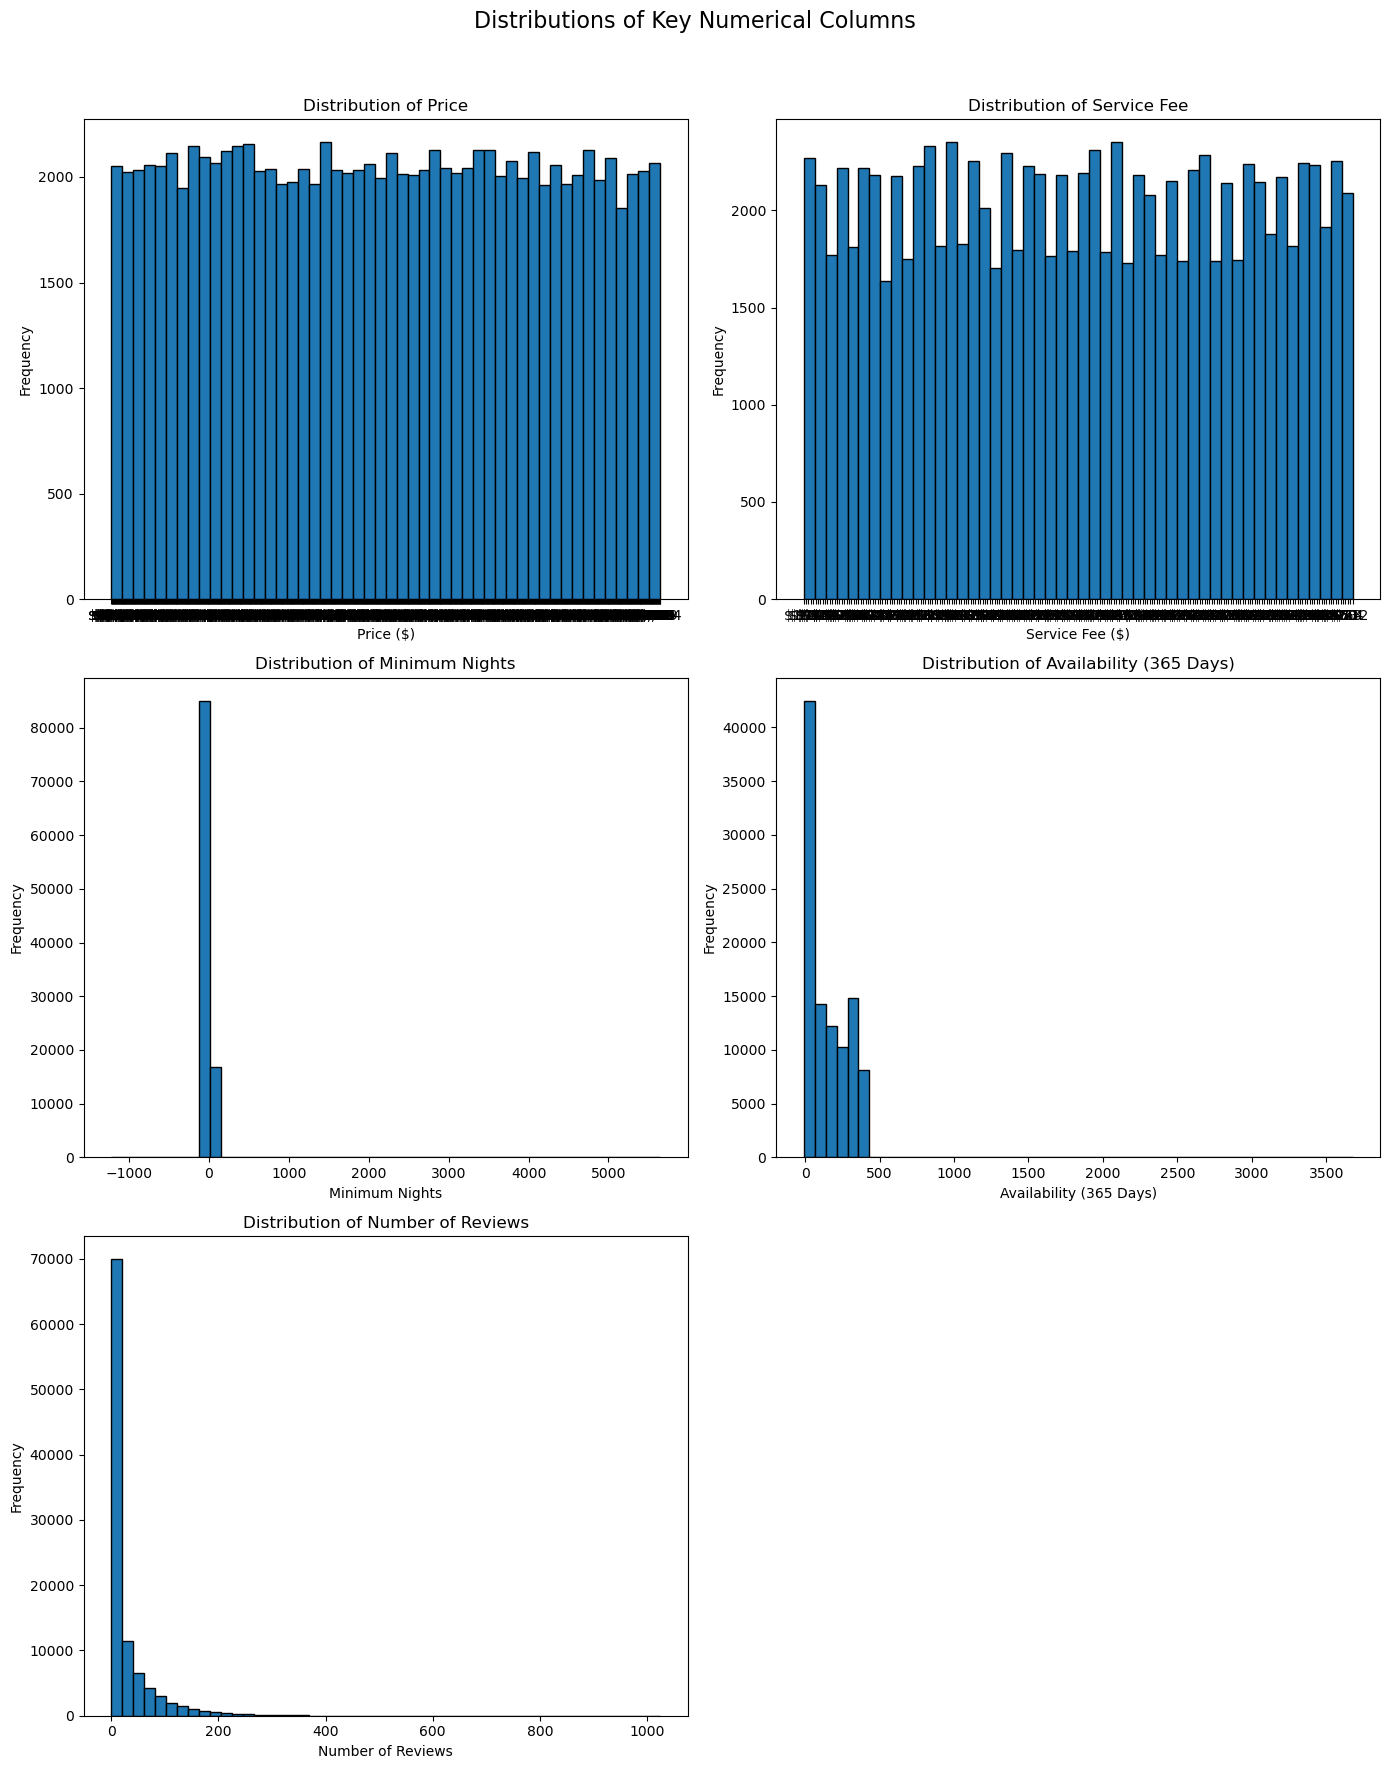

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
fig.suptitle('Distributions of Key Numerical Columns', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# 1. Price Distribution
axes[0].hist(df['price'].dropna(), bins=50, edgecolor='black')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Price')

# 2. Service Fee Distribution
axes[1].hist(df['service fee'].dropna(), bins=50, edgecolor='black')
axes[1].set_xlabel('Service Fee ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Service Fee')

# 3. Minimum Nights Distribution
axes[2].hist(df['minimum nights'].dropna(), bins=50, edgecolor='black')
axes[2].set_xlabel('Minimum Nights')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Minimum Nights')

# 4. Availability (365) Distribution
axes[3].hist(df['availability 365'].dropna(), bins=50, edgecolor='black')
axes[3].set_xlabel('Availability (365 Days)')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Distribution of Availability (365 Days)')

# 5. Number of Reviews Distribution
axes[4].hist(df['number of reviews'].dropna(), bins=50, edgecolor='black')
axes[4].set_xlabel('Number of Reviews')
axes[4].set_ylabel('Frequency')
axes[4].set_title('Distribution of Number of Reviews')

fig.delaxes(axes[5])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


## Categorical Feature Exploration

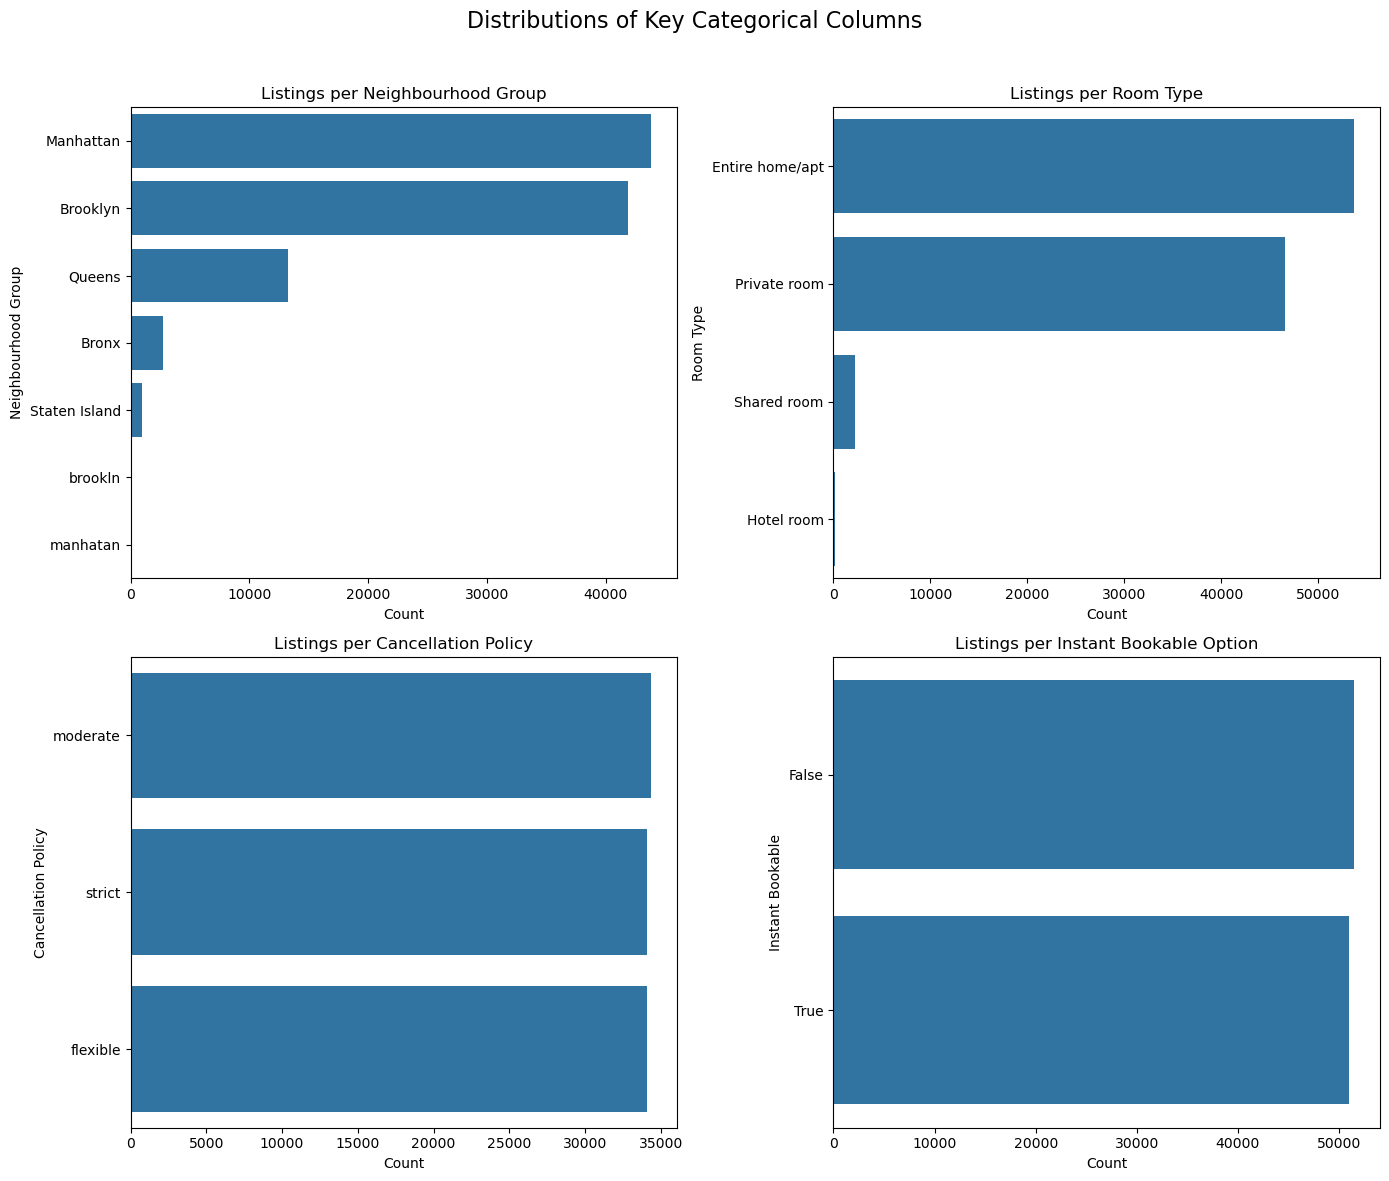

In [57]:
categorical_columns = ['neighbourhood group', 'room type', 'cancellation_policy', 'instant_bookable']

# Plotting distributions of each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle('Distributions of Key Categorical Columns', fontsize=16)

# 1. Neighbourhood Group Distribution
sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Neighbourhood Group')
axes[0, 0].set_title('Listings per Neighbourhood Group')

# 2. Room Type Distribution
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Room Type')
axes[0, 1].set_title('Listings per Room Type')

# 3. Cancellation Policy Distribution
sns.countplot(y='cancellation_policy', data=df, order=df['cancellation_policy'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Cancellation Policy')
axes[1, 0].set_title('Listings per Cancellation Policy')

# 4. Instant Bookable Distribution
sns.countplot(y='instant_bookable', data=df, order=df['instant_bookable'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Instant Bookable')
axes[1, 1].set_title('Listings per Instant Bookable Option')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


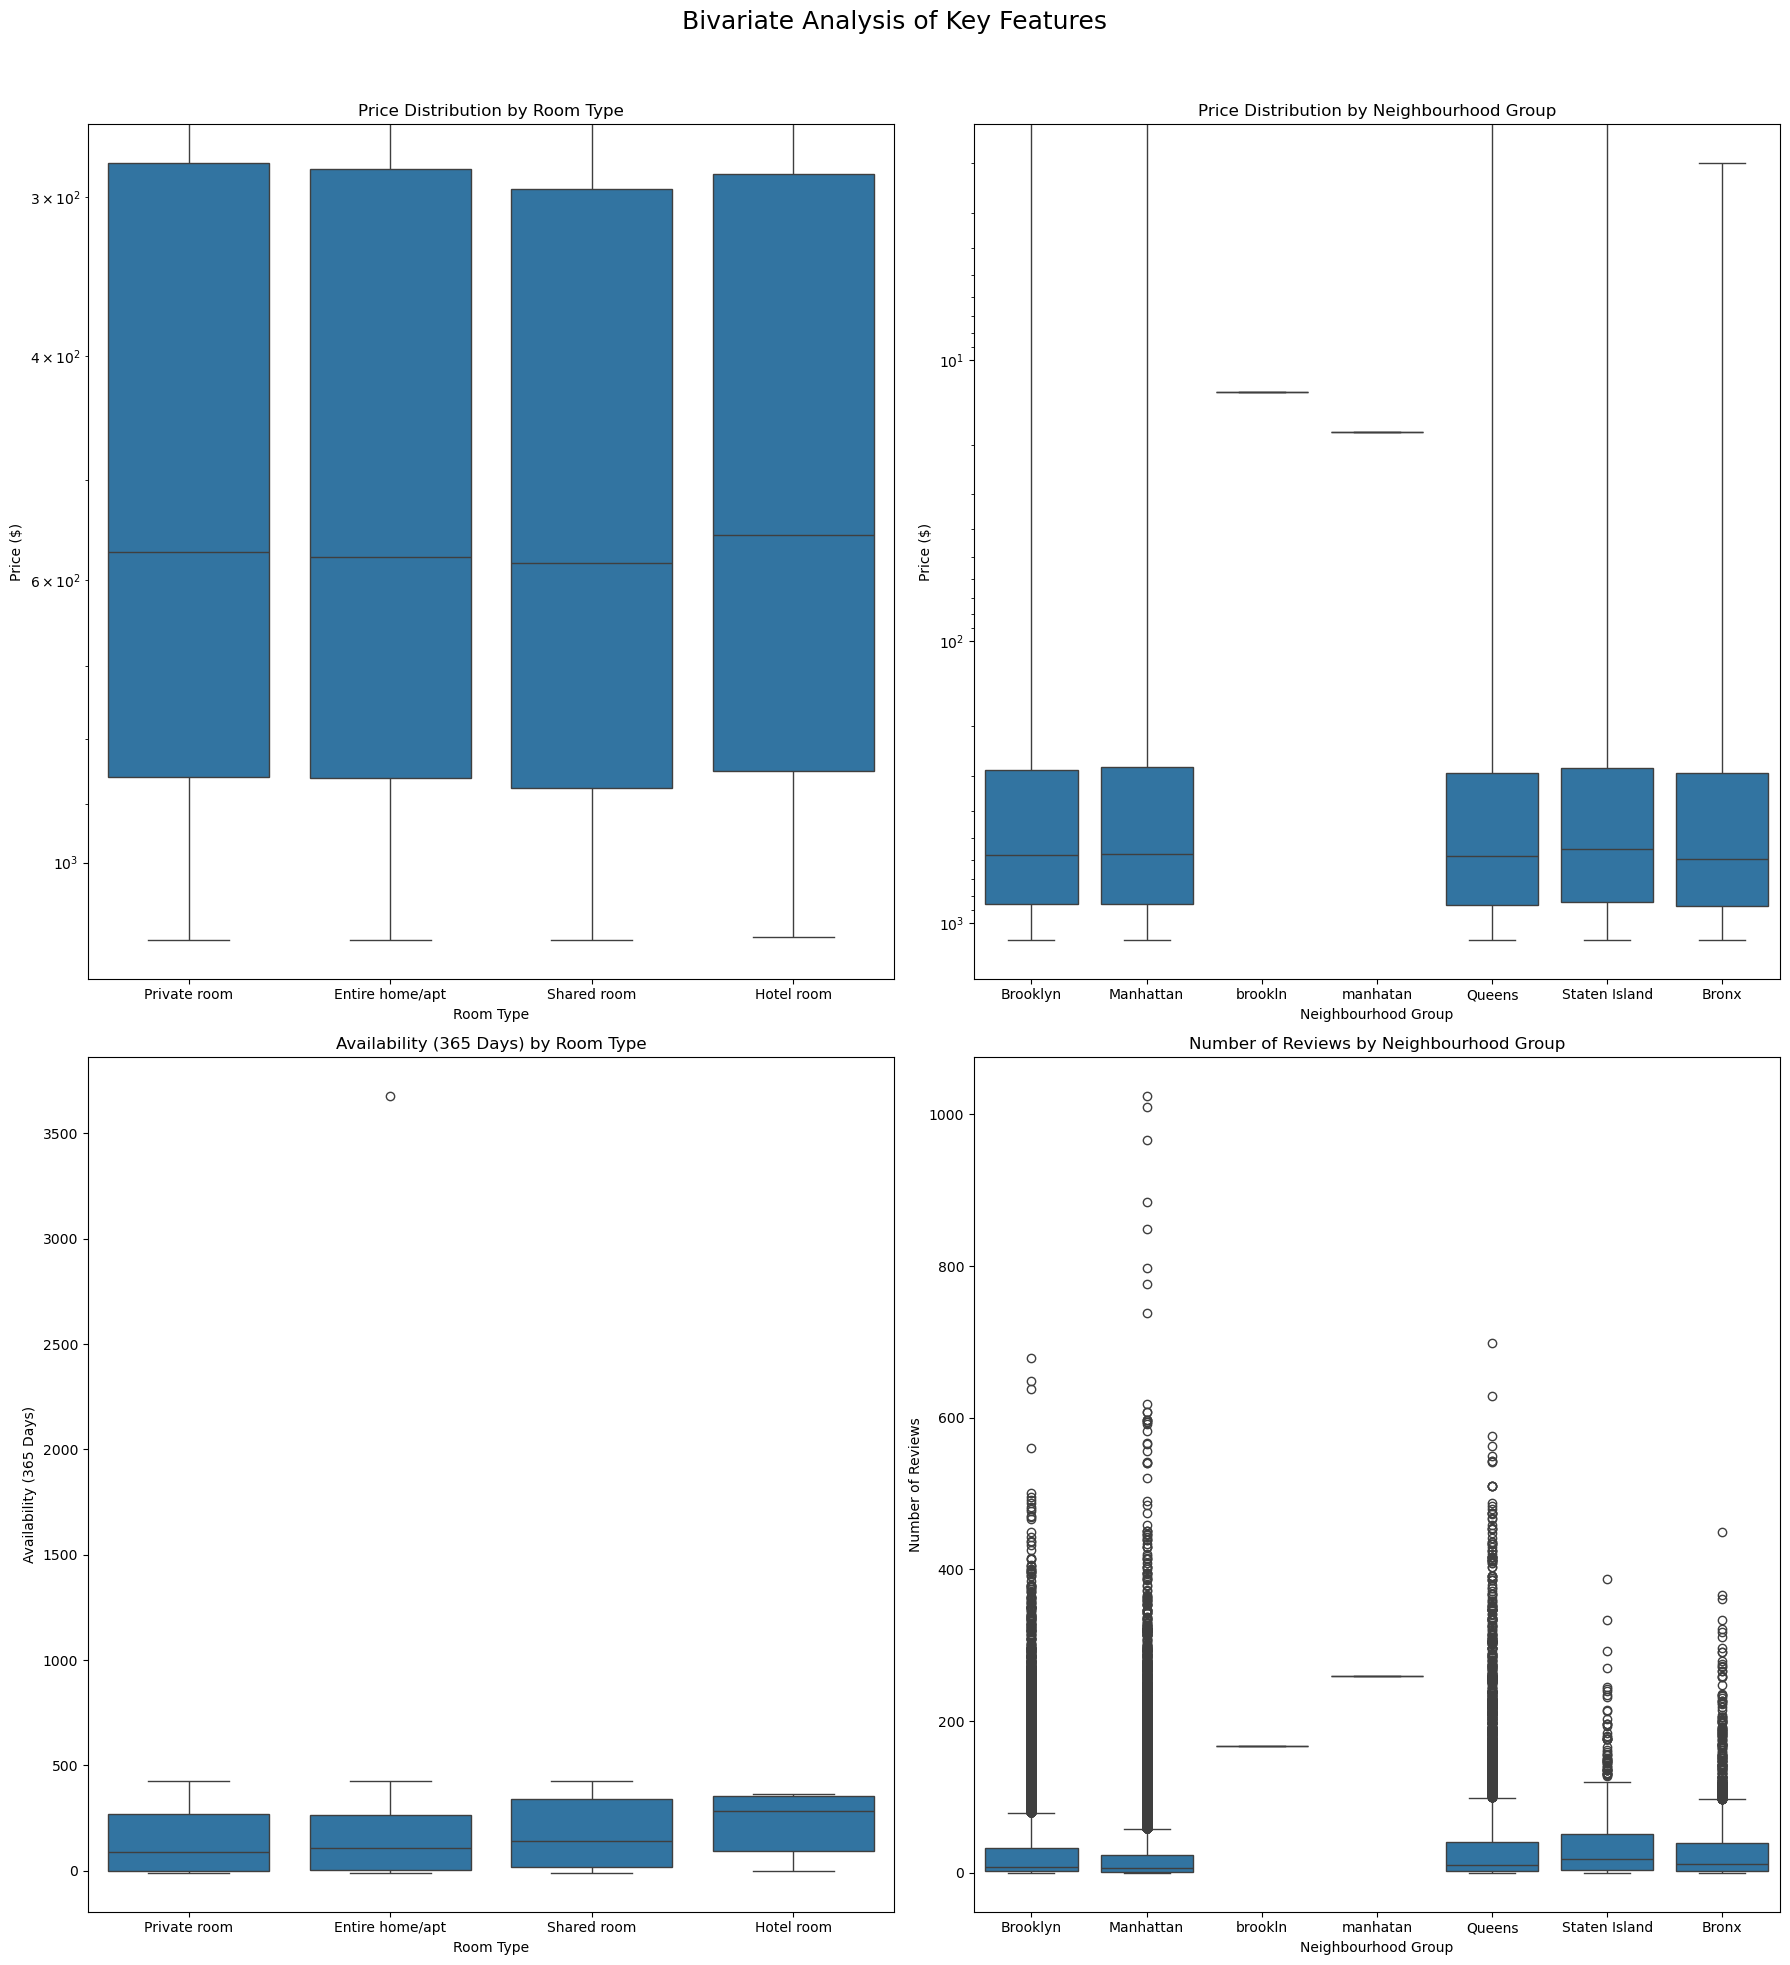

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 20))
fig.suptitle('Bivariate Analysis of Key Features', fontsize=18)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# 1. Price vs. Room Type
sns.boxplot(x='room type', y='price', data=df, ax=axes[0])
axes[0].set_yscale('log')  # Log scale to handle price outliers
axes[0].set_title('Price Distribution by Room Type')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Price ($)')

# 2. Price vs. Neighbourhood Group
sns.boxplot(x='neighbourhood group', y='price', data=df, ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Price Distribution by Neighbourhood Group')
axes[1].set_xlabel('Neighbourhood Group')
axes[1].set_ylabel('Price ($)')

# 3. Availability 365 vs. Room Type
sns.boxplot(x='room type', y='availability 365', data=df, ax=axes[2])
axes[2].set_title('Availability (365 Days) by Room Type')
axes[2].set_xlabel('Room Type')
axes[2].set_ylabel('Availability (365 Days)')

# 4. Number of Reviews vs. Neighbourhood Group
sns.boxplot(x='neighbourhood group', y='number of reviews', data=df, ax=axes[3])
axes[3].set_title('Number of Reviews by Neighbourhood Group')
axes[3].set_xlabel('Neighbourhood Group')
axes[3].set_ylabel('Number of Reviews')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

# Data Cleaning

In [222]:
# Step 1: Drop Unnecessary Columns

# Columns to drop:
# - 'id': Unique identifier for each listing, not informative for analysis. 
# - 'host id': Unique identifier for each host, not informative for analysis. Max repeated 2x
# - 'name': Listing names are textual and not useful for numerical analysis.
# - 'host name': Host names are irrelevant for our analysis.
# - 'license': Very few listings have a value for license (only 2 non-null values).
# - 'country': All listings are for New York City
# - 'country code': Similar to 'country', this column is not needed.
# - 'House rules: 50%+ are missing'

df_cleaned = df.drop(columns=['id', 'host id', 'NAME', 'host name', 'license', 'country', 'country code','house_rules'])

# Checking the resulting dataframe structure
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   host_identity_verified          102599 non-null  object        
 1   neighbourhood group             102599 non-null  object        
 2   neighbourhood                   102599 non-null  object        
 3   lat                             102599 non-null  float64       
 4   long                            102599 non-null  float64       
 5   instant_bookable                102599 non-null  bool          
 6   cancellation_policy             102599 non-null  object        
 7   room type                       102599 non-null  object        
 8   Construction year               102599 non-null  float64       
 9   price                           102599 non-null  float64       
 10  service fee                     102599 non-null  float64

In [224]:
# Checking the proportion of missing values in each column
missing_values = df_cleaned.isnull().mean().sort_values(ascending=False)
missing_values

host_identity_verified            0.0
neighbourhood group               0.0
calculated host listings count    0.0
review rate number                0.0
reviews per month                 0.0
last review                       0.0
number of reviews                 0.0
minimum nights                    0.0
service fee                       0.0
price                             0.0
Construction year                 0.0
room type                         0.0
cancellation_policy               0.0
instant_bookable                  0.0
long                              0.0
lat                               0.0
neighbourhood                     0.0
availability 365                  0.0
dtype: float64

In [226]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Handle Missing Values

# Fill missing values in 'reviews per month' with 0
df_cleaned['reviews per month'] = df_cleaned['reviews per month'].fillna(0)

# Convert 'last review' to datetime and fill missing values with the earliest date
df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'], errors='coerce')
earliest_date = df_cleaned['last review'].min()
df_cleaned['last review'] = df_cleaned['last review'].fillna(earliest_date)

# Identify numerical and categorical columns
num_columns = df_cleaned.select_dtypes(include=['float64']).columns.tolist()
cat_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Fill missing numerical columns with median
for col in num_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Fill missing categorical columns with mode
for col in cat_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Convert specified columns to integers
int_columns = ['minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count']
for col in int_columns:
    df_cleaned[col] = df_cleaned[col].astype(int)

# Clean 'price' and 'service fee' columns
df_cleaned['price'] = df_cleaned['price'].astype(str).replace(r'[\$,]', '', regex=True).astype(float)
df_cleaned['service fee'] = df_cleaned['service fee'].astype(str).replace(r'[\$,]', '', regex=True).astype(float)

# Step 3: Encode Categorical Variables

# One-hot encode smaller categorical variables
small_categorical_cols = ['host_identity_verified', 'room type', 'cancellation_policy', 'instant_bookable', 'neighbourhood group']
df_encoded = pd.get_dummies(df_cleaned, columns=small_categorical_cols, drop_first=True)

# Integer encode 'neighbourhood'
le = LabelEncoder()
df_encoded['neighbourhood_encoded'] = le.fit_transform(df_encoded['neighbourhood'])
df_encoded.drop('neighbourhood', axis=1, inplace=True)

# Step 4: Apply Log Transformation and Standardization

# Apply log transformation to skewed numerical features
df_encoded['minimum nights'] = np.log1p(df_encoded['minimum nights'])
df_encoded['availability 365'] = np.log1p(df_encoded['availability 365'])
df_encoded['number of reviews'] = np.log1p(df_encoded['number of reviews'])

# Replace any infinite values resulting from log transformation
df_encoded['minimum nights'] = df_encoded['minimum nights'].replace([np.inf, -np.inf], np.nan).fillna(df_encoded['minimum nights'].median())
df_encoded['availability 365'] = df_encoded['availability 365'].replace([np.inf, -np.inf], np.nan).fillna(df_encoded['availability 365'].median())
df_encoded['number of reviews'] = df_encoded['number of reviews'].replace([np.inf, -np.inf], np.nan).fillna(df_encoded['number of reviews'].median())

# Update list of numerical columns (excluding 'price' if it's your target variable)
numerical_cols = ['service fee', 'minimum nights', 'availability 365', 'number of reviews', 'neighbourhood_encoded']

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Final Data Check
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   lat                                102599 non-null  float64       
 1   long                               102599 non-null  float64       
 2   Construction year                  102599 non-null  float64       
 3   price                              102599 non-null  float64       
 4   service fee                        102599 non-null  float64       
 5   minimum nights                     102599 non-null  float64       
 6   number of reviews                  102599 non-null  float64       
 7   last review                        102599 non-null  datetime64[ns]
 8   reviews per month                  102599 non-null  float64       
 9   review rate number                 102599 non-null  int64         
 10  calculated host list

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Feature Engineering

In [229]:
df_encoded.head()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,...,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_True,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,neighbourhood group_Staten Island,neighbourhood group_brookln,neighbourhood group_manhatan,neighbourhood_encoded
0,40.64749,-73.97237,2020.0,966.0,1.027392,0.875347,0.058772,2021-10-19,0.21,4,...,False,True,False,True,False,False,False,False,False,0.037953
1,40.75362,-73.98377,2007.0,142.0,-1.458356,1.982159,1.036858,2022-05-21,0.38,4,...,True,False,False,False,True,False,False,False,False,0.311190
2,40.80902,-73.94190,2005.0,620.0,-0.012102,-0.205302,-1.417008,2012-07-11,0.00,5,...,False,False,True,False,True,False,False,False,False,-0.163379
3,40.68514,-73.95976,2005.0,368.0,-0.765359,1.982159,2.173521,2019-07-05,4.64,4,...,True,False,True,True,False,False,False,False,False,-0.954328
4,40.79851,-73.94399,2009.0,204.0,-1.262509,0.875347,0.058772,2018-11-19,0.10,3,...,True,False,False,False,True,False,False,False,False,-0.666710


## Cluster locations - Remove lat, long

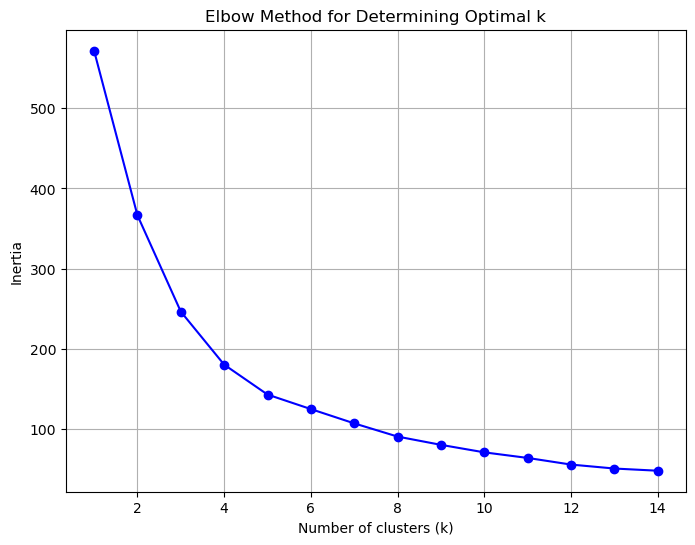

In [232]:
# Step 1: Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded[['lat', 'long']])
    inertia.append(kmeans.inertia_)

# Step 2: Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.grid(True)
plt.show()

# Step 3: Interpret the elbow plot and set k_optimal
k_optimal = 5  # Adjust based on your elbow plot

# Step 4: Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_encoded['location_cluster'] = kmeans.fit_predict(df_encoded[['lat', 'long']])

# One-hot encode the clusters
df_encoded = pd.get_dummies(df_encoded, columns=['location_cluster'], prefix='cluster')

# Drop 'lat' and 'long' if no longer needed
df_encoded.drop(['lat', 'long'], axis=1, inplace=True)

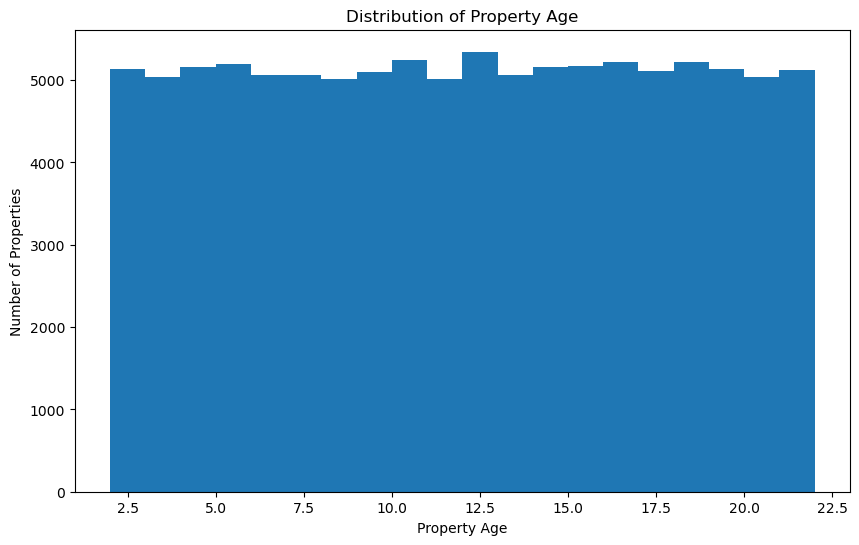

Bins after sorting and removing duplicates: [0, 5, 10, 15, 22.0]
Number of bins: 5
Number of labels: 4
age_category
16-21 years    30848
11-15 years    25742
6-10 years     25477
0-5 years      20532
Name: count, dtype: int64


In [233]:
# Step 1: Calculate property age
current_year = pd.Timestamp.now().year
df_encoded['property_age'] = current_year - df_encoded['Construction year']
df_encoded['property_age'] = df_encoded['property_age'].apply(lambda x: x if x > 0 else 0)

# Optional: Visualize the distribution
import matplotlib.pyplot as plt

plt.hist(df_encoded['property_age'], bins=range(int(df_encoded['property_age'].min()), int(df_encoded['property_age'].max()) + 2))
plt.xlabel('Property Age')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Age')
plt.show()

# Step 2: Define bins and labels based on the data
bins = [0, 5, 10, 15, max_age + 1]  # Adjusted to [0, 5, 10, 15, 22]
labels = ['0-5 years', '6-10 years', '11-15 years', '16-21 years']

# Ensure bins are unique and sorted
bins = sorted(set(bins))
print("Bins after sorting and removing duplicates:", bins)
print("Number of bins:", len(bins))
print("Number of labels:", len(labels))

# Step 3: Create binned feature
df_encoded['age_category'] = pd.cut(
    df_encoded['property_age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Optional: Check the distribution of the new feature
print(df_encoded['age_category'].value_counts())

# Step 4: One-hot encode the new categorical feature
df_encoded = pd.get_dummies(df_encoded, columns=['age_category'], drop_first=True)

# Step 5: Drop 'Construction year' and 'property_age' if not needed
df_encoded.drop(['Construction year', 'property_age'], axis=1, inplace=True)

In [236]:
# Convert 'last review' to datetime
df_encoded['last review'] = pd.to_datetime(df_encoded['last review'], errors='coerce')

# Calculate days since last review
df_encoded['days_since_last_review'] = (pd.Timestamp('today') - df_encoded['last review']).dt.days

# Fill missing values with a large number (e.g., max days)
max_days = df_encoded['days_since_last_review'].max()
df_encoded['days_since_last_review'] = df_encoded['days_since_last_review'].fillna(max_days)

# Drop 'last review' if no longer needed
df_encoded.drop('last review', axis=1, inplace=True)

In [238]:
# Initialize scaler
scaler = StandardScaler()

# Standardize numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# --- Create Interaction Terms ---

# Get the list of one-hot encoded 'neighbourhood group' columns
neighbourhood_group_cols = [col for col in df_encoded.columns if col.startswith('neighbourhood group_')]

# Create interaction terms for each 'neighbourhood group' with 'room type_Private room'
for col in neighbourhood_group_cols:
    if 'room type_Private room' in df_encoded.columns:
        interaction_term = f"{col}_PrivateRoom"
        df_encoded[interaction_term] = df_encoded[col] * df_encoded['room type_Private room']

# --- Final Data Check ---

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 37 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   price                                          102599 non-null  float64
 1   service fee                                    102599 non-null  float64
 2   minimum nights                                 102599 non-null  float64
 3   number of reviews                              102599 non-null  float64
 4   reviews per month                              102599 non-null  float64
 5   review rate number                             102599 non-null  int64  
 6   calculated host listings count                 102599 non-null  int64  
 7   availability 365                               102599 non-null  float64
 8   host_identity_verified_verified                102599 non-null  bool   
 9   room type_Hotel room                 

In [240]:
df_encoded.head()

,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,host_identity_verified_verified,room type_Hotel room,...,age_category_6-10 years,age_category_11-15 years,age_category_16-21 years,days_since_last_review,neighbourhood group_Brooklyn_PrivateRoom,neighbourhood group_Manhattan_PrivateRoom,neighbourhood group_Queens_PrivateRoom,neighbourhood group_Staten Island_PrivateRoom,neighbourhood group_brookln_PrivateRoom,neighbourhood group_manhatan_PrivateRoom
0,966.0,1.027392,0.875347,0.058772,0.21,4,6,0.873787,False,False,...,False,False,False,1113,True,False,False,False,False,False
1,142.0,-1.458356,1.982159,1.036858,0.38,4,2,0.773941,True,False,...,False,False,True,899,False,False,False,False,False,False
2,620.0,-0.012102,-0.205302,-1.417008,0.00,5,1,0.965331,False,False,...,False,False,True,4500,False,True,False,False,False,False
3,368.0,-0.765359,1.982159,2.173521,4.64,4,1,0.926050,False,False,...,False,False,True,1950,False,False,False,False,False,False
4,204.0,-1.262509,0.875347,0.058772,0.10,3,1,0.878387,True,False,...,False,True,False,2178,False,False,False,False,False,False


# PCA?

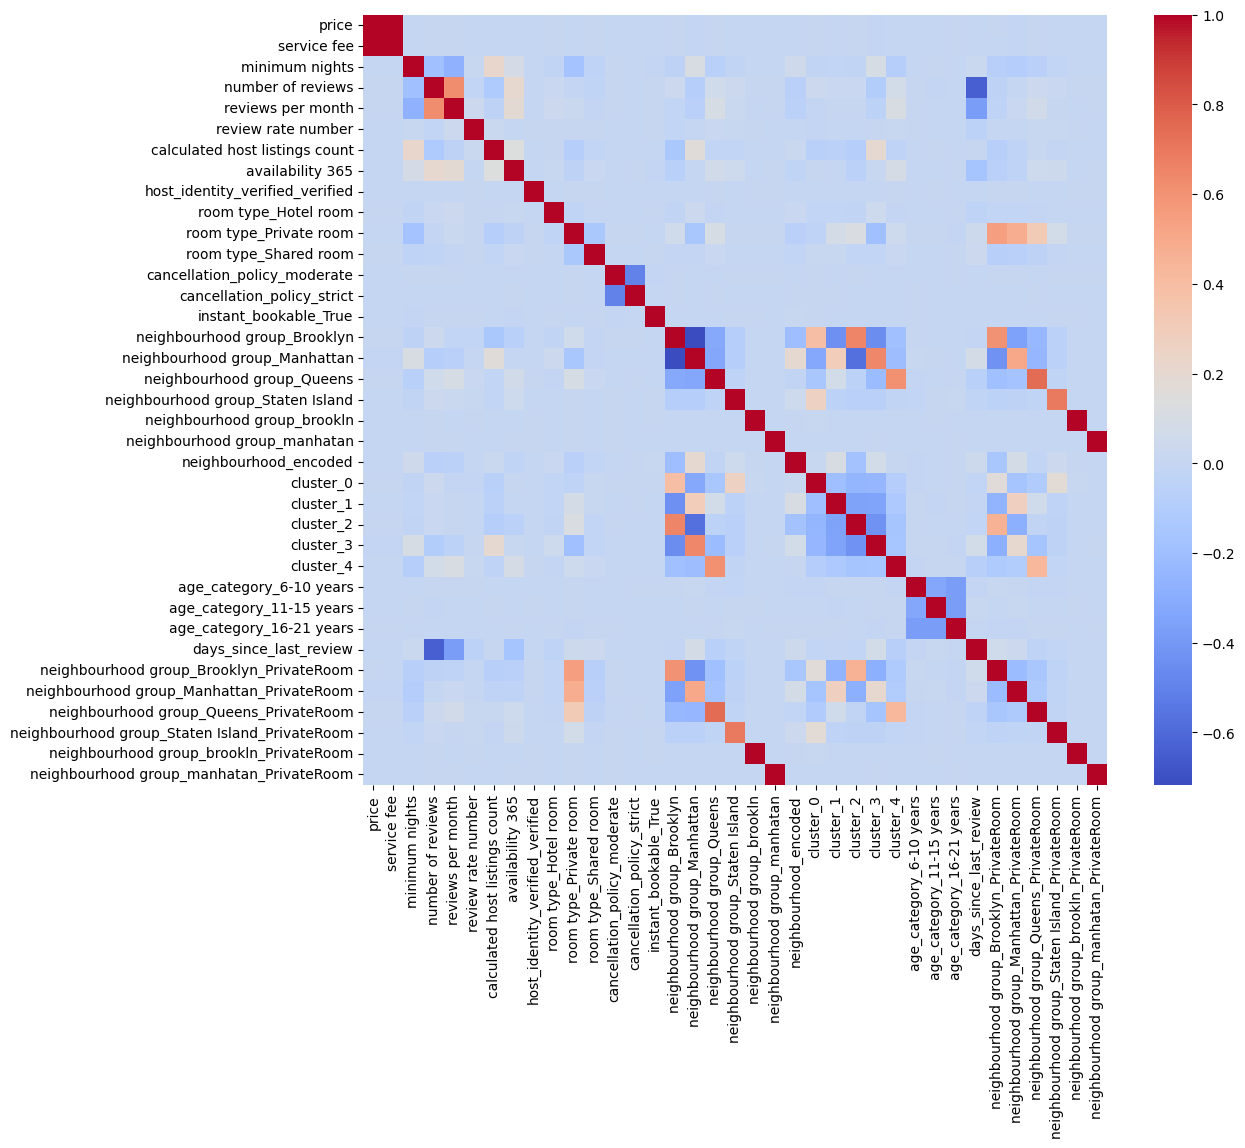

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.show()
